In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Environmental Dataset

### Data Processing

In [2]:
env_df = pd.read_csv("environmental_dataset.csv")

In [3]:
env_df.head(5)

SensorID   SensorLocation  Pollutant_PM2.5_µg/m³  Pollutant_PM10_µg/m³  \
0  S000001  Industrial Area                 71.990               101.550   
1  S000002  Industrial Area                 69.960                16.710   
2  S000003            Rural                 78.135               100.404   
3  S000004  Industrial Area                 79.640               128.900   
4  S000005  Industrial Area                 63.350               296.260   

   Pollutant_O3_ppb  Pollutant_NO2_ppb  Pollutant_CO_ppm  Pollutant_SO2_ppb  \
0           183.240              65.92             30.81             33.040   
1            40.990             123.30              4.12             26.440   
2            30.016              55.27             23.65              6.564   
3            29.500             130.68              9.10             28.580   
4            76.560              52.04             29.87             44.110   

   UrbanVegetationArea_m2  Humidity_%  ...  EnergySavingTechnology  \
0                  750.58       42.68  ...            Solar Panels   
1                  982.93       62.27  ...                     NaN   
2                 8780.38       78.95  ...          Efficient HVAC   
3                     NaN       36.55  ...            LED Lighting   
4                  917.23       41.13  ...       Smart Thermostats   

  AnnualEnergySavings_%  PopulationDensity_people/km²  RetrofitData  \
0                  5.22                       1912.59           Yes   
1                 31.74                       1144.57           Yes   
2                 15.66                           NaN           Yes   
3                 29.32                       1832.64           Yes   
4                 16.29                       1624.23           Yes   

  RenewableEnergyPercentage_%  AnnualEnergyConsumption_kWh  GreenSpaceIndex_%  \
0                        1.16                     47054.58              30.69   
1                       44.40                     20672.65               5.96   
2                       21.35                     49459.50              48.10   
3                       15.75                      5953.21              15.77   
4                       13.81                     16232.45              57.01   

   HistoricPollutantLevels     Country AQI_Index  
0                   164.21  Kyrgyzstan     87.92  
1                   180.58       Yemen     51.54  
2                   290.00  Kyrgyzstan     64.06  
3                   241.86    Cambodia     77.47  
4                    90.68    Thailand    106.47  

[5 rows x 21 columns]

In [4]:
env_df.rename(columns = {
    "Pollutant_PM2.5_µg/m³": "PM2.5",
    "Pollutant_PM10_µg/m³": "PM10",
    "Pollutant_O3_ppb": "O3",
    "Pollutant_NO2_ppb": "NO2", 
    "Pollutant_CO_ppm": "CO",
    "Pollutant_SO2_ppb": "SO2",
    "PopulationDensity_people/km²": "PopulationDensity"
}, inplace = True)

##### Handling Missing Values

In [5]:
env_df.isna().sum()

SensorID                          0
SensorLocation                    0
PM2.5                             0
PM10                              0
O3                                0
NO2                               0
CO                                0
SO2                               0
UrbanVegetationArea_m2         2521
Humidity_%                        0
AirTemperature_C                  0
EnergySavingTechnology         1094
AnnualEnergySavings_%             0
PopulationDensity              1024
RetrofitData                      0
RenewableEnergyPercentage_%     749
AnnualEnergyConsumption_kWh       0
GreenSpaceIndex_%                 0
HistoricPollutantLevels           0
Country                           0
AQI_Index                         0
dtype: int64

In [6]:
groupby_country_df = env_df.groupby(by = "Country").agg({
    "UrbanVegetationArea_m2": "median",
    "EnergySavingTechnology": lambda x: x.mode().iloc[0],
    "PopulationDensity": "median",
    "RenewableEnergyPercentage_%": "median"
})

groupby_country_df

UrbanVegetationArea_m2 EnergySavingTechnology  \
Country                                                       
Afghanistan                 1916.230           Solar Panels   
Armenia                     1710.950           Solar Panels   
Azerbaijan                  2218.540           Solar Panels   
Bangladesh                  1724.230           Solar Panels   
Bhutan                      1991.750           Solar Panels   
Brunei                      2078.790           Solar Panels   
Cambodia                    2143.395           Solar Panels   
China                       2080.090           Solar Panels   
Georgia                     2160.080           Solar Panels   
India                       1983.300           Solar Panels   
Indonesia                   1832.270           Solar Panels   
Japan                       2119.725           Solar Panels   
Kazakhstan                  2147.000           Solar Panels   
Kyrgyzstan                  1727.855           Solar Panels   
Laos                        1950.680           Solar Panels   
Malaysia                    1699.825           Solar Panels   
Maldives                    1607.470           Solar Panels   
Mongolia                    2185.330           Solar Panels   
Myanmar                     2220.120           Solar Panels   
Nepal                       1786.880           Solar Panels   
Pakistan                    1828.730           Solar Panels   
Philippines                 2172.895           Solar Panels   
Singapore                   2234.440           Solar Panels   
South Korea                 2112.980           Solar Panels   
Sri Lanka                   1704.550           Solar Panels   
Tajikistan                  2142.820           Solar Panels   
Thailand                    1542.660           Solar Panels   
Timor-Leste                 2036.365           Solar Panels   
Turkmenistan                2101.410           Solar Panels   
Uzbekistan                  1835.600           Solar Panels   
Vietnam                     1900.580           Solar Panels   
Yemen                       2236.380           Solar Panels   

              PopulationDensity  RenewableEnergyPercentage_%  
Country                                                       
Afghanistan            1133.140                       24.035  
Armenia                1180.440                       25.915  
Azerbaijan             1133.180                       23.765  
Bangladesh             1200.090                       21.280  
Bhutan                 1321.390                       25.740  
Brunei                 1175.420                       26.725  
Cambodia                922.750                       24.050  
China                  1305.650                       23.810  
Georgia                1115.730                       26.095  
India                  1212.480                       25.260  
Indonesia               956.050                       27.320  
Japan                  1051.890                       23.240  
Kazakhstan             1163.425                       24.645  
Kyrgyzstan             1396.440                       23.250  
Laos                   1284.120                       26.230  
Malaysia               1288.600                       21.780  
Maldives               1241.605                       25.720  
Mongolia               1295.680                       23.175  
Myanmar                1131.265                       24.650  
Nepal                  1076.565                       24.485  
Pakistan               1310.200                       24.250  
Philippines            1207.550                       24.060  
Singapore              1044.240                       21.660  
South Korea            1157.470                       25.520  
Sri Lanka              1360.965                       25.260  
Tajikistan             1195.110                       25.420  
Thailand               1153.440                       25.650  
Timor-Leste            1215.525             

In [7]:
groupby_country_df.reset_index(inplace = True)

In [8]:
env_df = pd.merge(env_df, groupby_country_df, on = "Country", how = "left", suffixes = ["", "_agg"])

In [9]:
columns_to_fill = ["UrbanVegetationArea_m2", "EnergySavingTechnology", "PopulationDensity", "RenewableEnergyPercentage_%"]
for column in columns_to_fill:
    env_df[column].fillna(env_df[f"{column}_agg"], inplace = True)
    env_df.drop(columns = [f"{column}_agg"], inplace = True)

C:\Users\PC\AppData\Local\Temp\ipykernel_19100\2128449075.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  env_df[column].fillna(env_df[f"{column}_agg"], inplace = True)
C:\Users\PC\AppData\Local\Temp\ipykernel_19100\2128449075.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


##### Handling Duplicate Values

In [10]:
env_df.drop(columns = ["SensorID"], inplace = True)

In [11]:
env_df.duplicated().sum()

np.int64(0)

### Exploratory Data Analysis (EDA)

In [12]:
def barplot_handler(data, y, x, title, xlabel, ylabel):
    sns.barplot(
        data = data, 
        y = y,
        hue = y, 
        x = x, 
        orient = "h", 
        palette = ["#60a5fa" if i == 0 else "#dbeafe" for i in range(data[data.columns[0]].count())],
        legend = False
    )
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [13]:
def scatterplot_handler(data, y, x, title, xlabel, ylabel):
    sns.scatterplot(
        data = data,
        y = y,
        x = x
    )

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [14]:
def boxplot_handler(data, title):
    plt.figure(figsize = (8, 5))

    sns.boxplot(
        data = data,
    )

    plt.title(title)
    plt.show()

In [29]:
def remove_outliers_handler(data, column):
    if isinstance(data, pd.DataFrame):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)

        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR 
        upper_bound = Q3 + 1.5 * IQR

        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]   
        return data 
    else:
        return data


#### Annual Energy Savings

##### Energy Saving Technology

In [15]:
groupby_est_df = env_df.groupby(by = "EnergySavingTechnology").agg({
    "AnnualEnergySavings_%": "mean"
}).sort_values(by = "AnnualEnergySavings_%", ascending = False)

groupby_est_df

AnnualEnergySavings_%
EnergySavingTechnology                       
Smart Thermostats                   22.598621
Insulation                          22.125269
LED Lighting                        21.918974
Efficient HVAC                      21.867222
Solar Panels                        21.421467

In [16]:
groupby_est_df.reset_index(inplace = True)

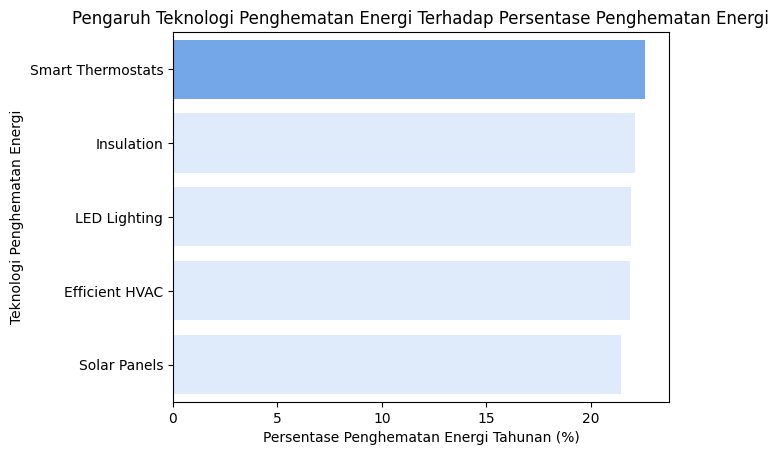

In [17]:
barplot_handler(
    groupby_est_df, 
    "EnergySavingTechnology", 
    "AnnualEnergySavings_%", 
    "Pengaruh Teknologi Penghematan Energi Terhadap Persentase Penghematan Energi", 
    "Persentase Penghematan Energi Tahunan (%)", 
    "Teknologi Penghematan Energi"
)

##### Retrofit

In [18]:
groupby_retrofit_df = env_df.groupby(by = "RetrofitData").agg({
    "AnnualEnergySavings_%": "mean"
}).sort_values(by =  "AnnualEnergySavings_%", ascending = False)

groupby_retrofit_df

AnnualEnergySavings_%
RetrofitData                       
Yes                       21.838261
No                        21.605977

In [19]:
groupby_retrofit_df.reset_index(inplace = True)

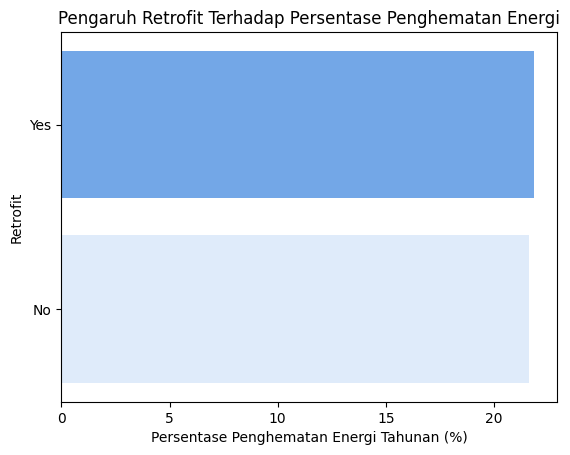

In [20]:
barplot_handler(
    groupby_retrofit_df, 
    "RetrofitData", 
    "AnnualEnergySavings_%", 
    "Pengaruh Retrofit Terhadap Persentase Penghematan Energi", 
    "Persentase Penghematan Energi Tahunan (%)", 
    "Retrofit"
)

##### Urban Vegetation Area

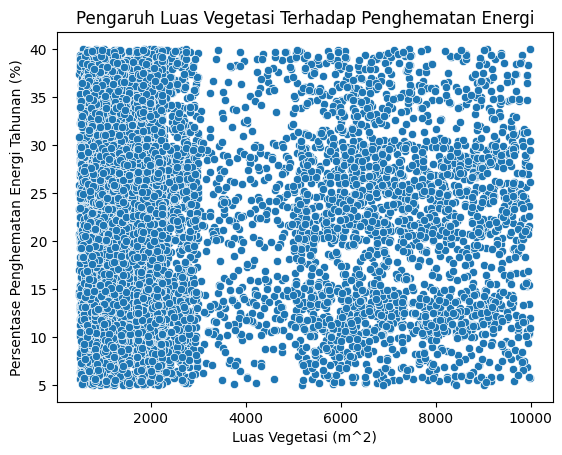

In [21]:
scatterplot_handler(
    env_df,
    "AnnualEnergySavings_%",
    "UrbanVegetationArea_m2",
    "Pengaruh Luas Vegetasi Terhadap Penghematan Energi",
    "Luas Vegetasi (m^2)",
    "Persentase Penghematan Energi Tahunan (%)"
)

##### Humidity

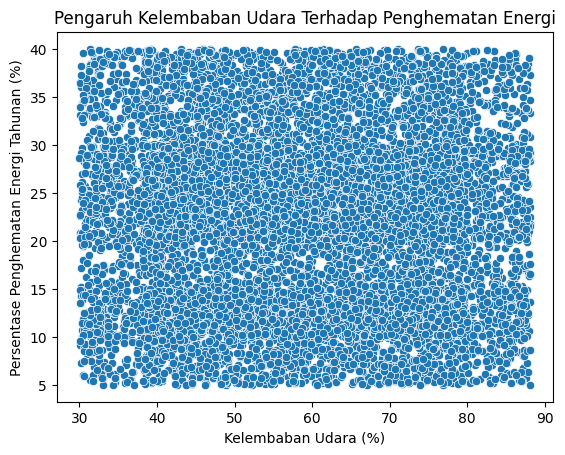

In [22]:
scatterplot_handler(
    env_df,
    "AnnualEnergySavings_%",
    "Humidity_%",
    "Pengaruh Kelembaban Udara Terhadap Penghematan Energi",
    "Kelembaban Udara (%)",
    "Persentase Penghematan Energi Tahunan (%)"
)

##### Population Density

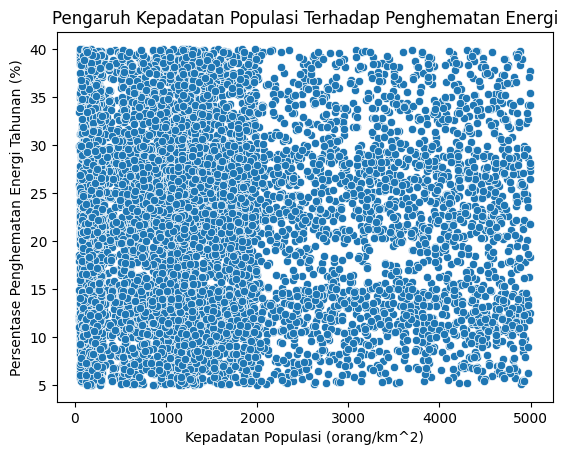

In [23]:
scatterplot_handler(
    env_df,
    "AnnualEnergySavings_%",
    "PopulationDensity",
    "Pengaruh Kepadatan Populasi Terhadap Penghematan Energi",
    "Kepadatan Populasi (orang/km^2)",
    "Persentase Penghematan Energi Tahunan (%)"
)

##### Renewable Energy Percentage

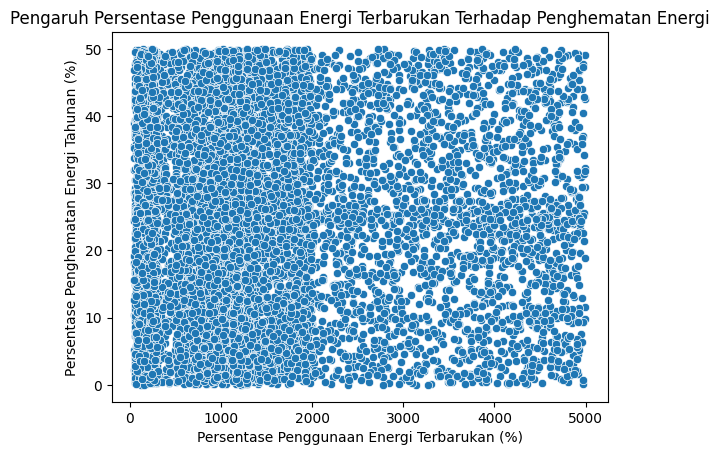

In [24]:
scatterplot_handler(
    env_df,
    "RenewableEnergyPercentage_%",
    "PopulationDensity",
    "Pengaruh Persentase Penggunaan Energi Terbarukan Terhadap Penghematan Energi",
    "Persentase Penggunaan Energi Terbarukan (%)",
    "Persentase Penghematan Energi Tahunan (%)"
)

##### Annual Energy Consumption

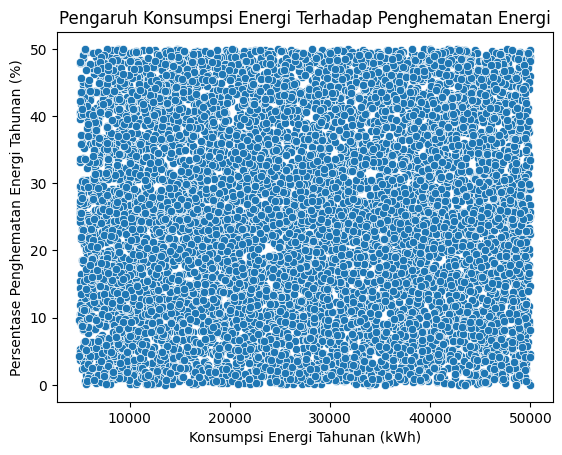

In [25]:
scatterplot_handler(
    env_df,
    "RenewableEnergyPercentage_%",
    "AnnualEnergyConsumption_kWh",
    "Pengaruh Konsumpsi Energi Terhadap Penghematan Energi",
    "Konsumpsi Energi Tahunan (kWh)",
    "Persentase Penghematan Energi Tahunan (%)"
)

##### Green Space Index

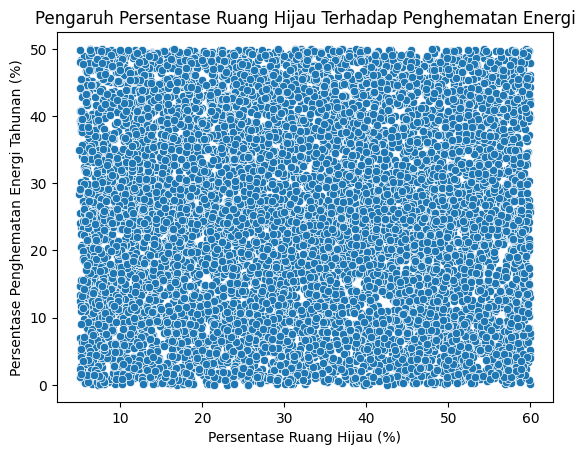

In [26]:
scatterplot_handler(
    env_df,
    "RenewableEnergyPercentage_%",
    "GreenSpaceIndex_%",
    "Pengaruh Persentase Ruang Hijau Terhadap Penghematan Energi",
    "Persentase Ruang Hijau (%)",
    "Persentase Penghematan Energi Tahunan (%)"
)

##### Historic Pollutant Levels

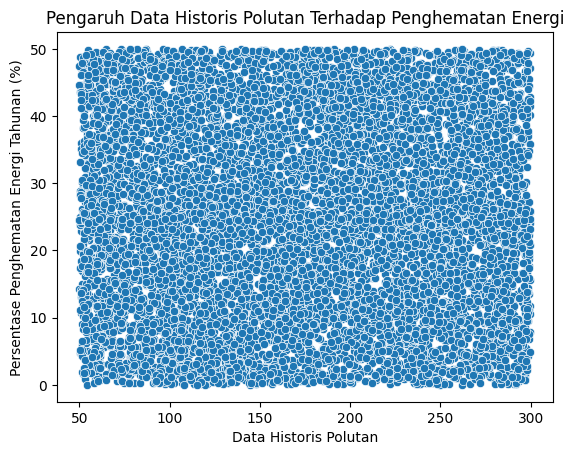

In [27]:
scatterplot_handler(
    env_df,
    "RenewableEnergyPercentage_%",
    "HistoricPollutantLevels",
    "Pengaruh Data Historis Polutan Terhadap Penghematan Energi",
    "Data Historis Polutan",
    "Persentase Penghematan Energi Tahunan (%)"
)

##### Handle Outliers

In [28]:
energy_df = env_df[[
    "UrbanVegetationArea_m2", 
    "Humidity_%", 
    "AirTemperature_C", 
    "EnergySavingTechnology", 
    "PopulationDensity", 
    "RetrofitData",
    "RenewableEnergyPercentage_%",
    "AnnualEnergyConsumption_kWh",
    "GreenSpaceIndex_%",
    "HistoricPollutantLevels",
    "AnnualEnergySavings_%"
]]

In [30]:
energy_df_categorical_columns = ["EnergySavingTechnology", "RetrofitData"]

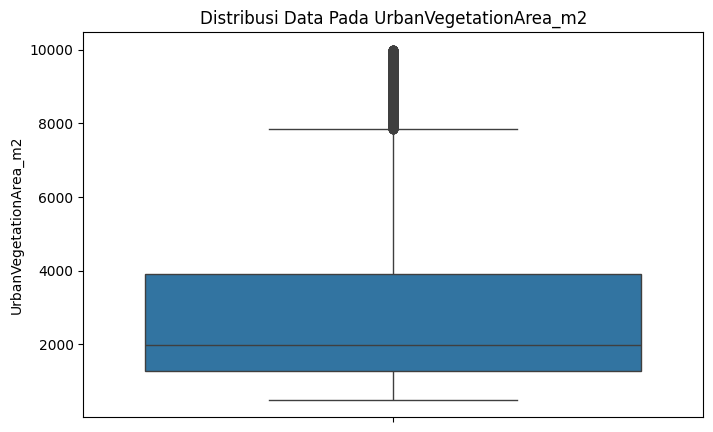

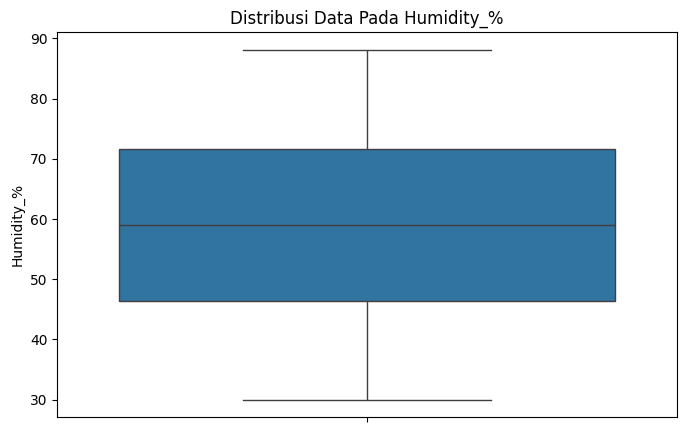

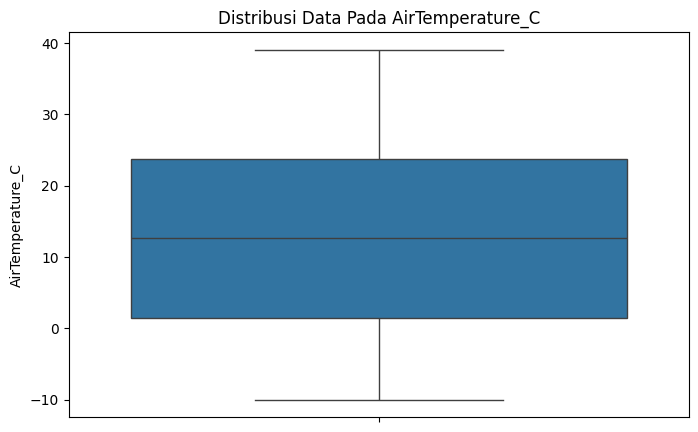

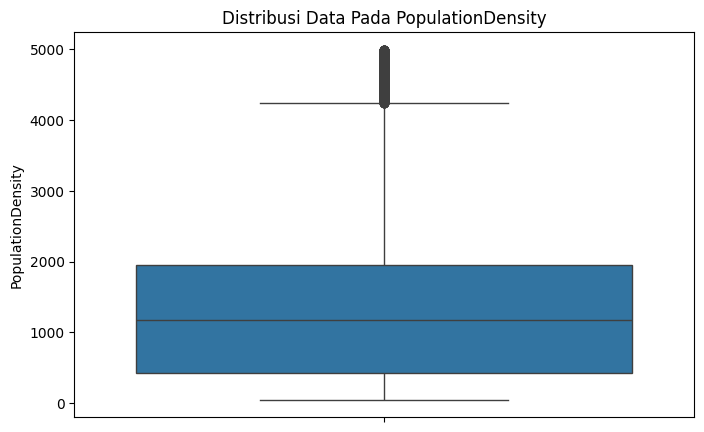

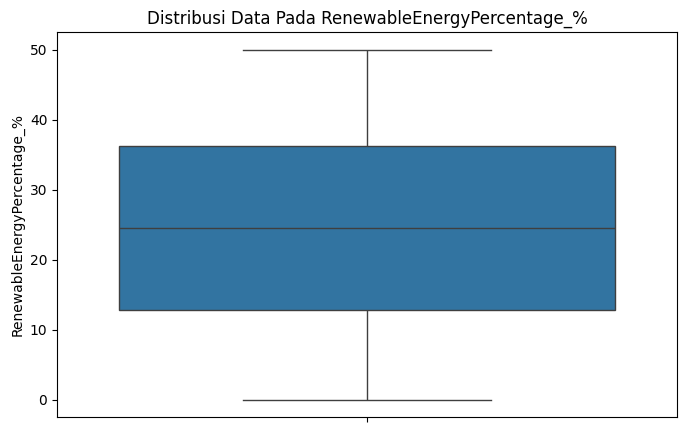

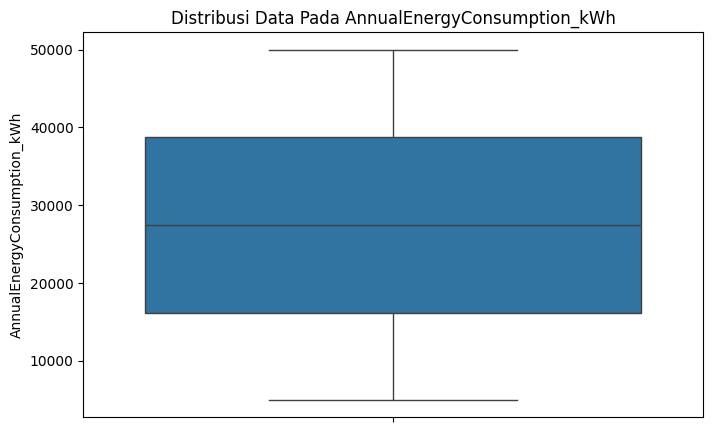

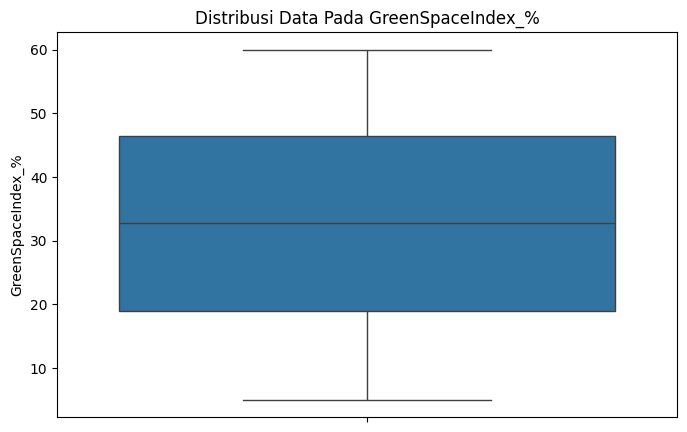

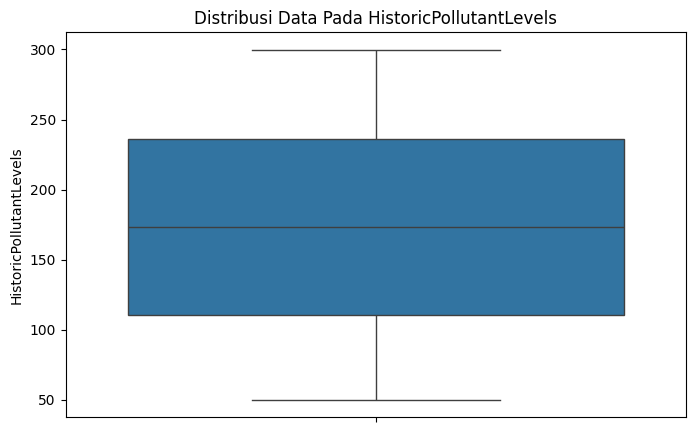

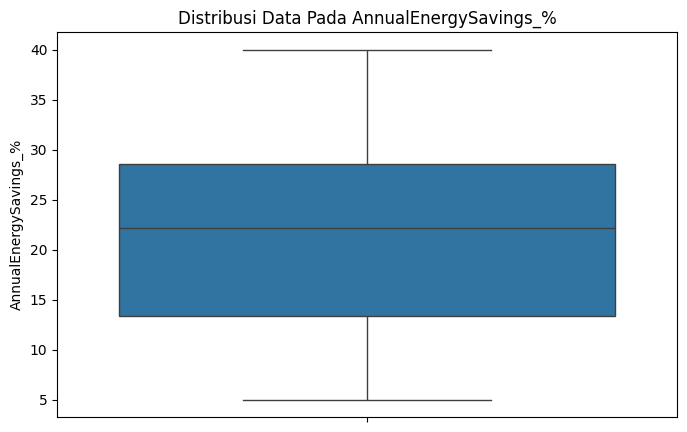

In [31]:
energy_df_numerical_columns = []
for column in energy_df.columns:
    if column not in energy_df_categorical_columns:
        energy_df_numerical_columns.append(column)
        boxplot_handler(energy_df[column], f"Distribusi Data Pada {column}")

In [32]:
energy_df = remove_outliers_handler(energy_df, "UrbanVegetationArea_m2")
energy_df = remove_outliers_handler(energy_df, "PopulationDensity")

##### Feature Importance and Correlation

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [34]:
scaler = StandardScaler()

In [35]:
for column in energy_df_categorical_columns:
    if column in energy_df.columns:
        energy_df[column] = energy_df[column].astype("category").cat.codes

In [36]:
X_edf = energy_df.drop(columns = ["AnnualEnergySavings_%"])
y_edf = energy_df["AnnualEnergySavings_%"]

In [37]:
X_scaled_edf = scaler.fit_transform(X_edf)

In [38]:
rfr = RandomForestRegressor()

In [39]:
rfr.fit(X_scaled_edf, y_edf)

RandomForestRegressor()

In [40]:
feature_importance = pd.DataFrame({
    "Feature": X_edf.columns,
    "Importance": rfr.feature_importances_
}).sort_values(by = "Importance", ascending = False)

feature_importance

Feature  Importance
6  RenewableEnergyPercentage_%    0.668452
2             AirTemperature_C    0.046771
7  AnnualEnergyConsumption_kWh    0.046353
1                   Humidity_%    0.045284
8            GreenSpaceIndex_%    0.044974
9      HistoricPollutantLevels    0.044870
0       UrbanVegetationArea_m2    0.043458
4            PopulationDensity    0.043336
3       EnergySavingTechnology    0.011095
5                 RetrofitData    0.005405

In [41]:
energy_df.corr()

UrbanVegetationArea_m2  Humidity_%  \
UrbanVegetationArea_m2                     1.000000   -0.075030   
Humidity_%                                -0.075030    1.000000   
AirTemperature_C                          -0.010882    0.015455   
EnergySavingTechnology                    -0.003344    0.008737   
PopulationDensity                         -0.413931    0.086331   
RetrofitData                              -0.000069   -0.007050   
RenewableEnergyPercentage_%                0.011344    0.000116   
AnnualEnergyConsumption_kWh               -0.003847    0.002378   
GreenSpaceIndex_%                         -0.003964    0.014035   
HistoricPollutantLevels                    0.003883   -0.016693   
AnnualEnergySavings_%                      0.006815   -0.009055   

                             AirTemperature_C  EnergySavingTechnology  \
UrbanVegetationArea_m2              -0.010882               -0.003344   
Humidity_%                           0.015455                0.008737   
AirTemperature_C                     1.000000               -0.002367   
EnergySavingTechnology              -0.002367                1.000000   
PopulationDensity                    0.017963                0.013065   
RetrofitData                         0.008252               -0.015635   
RenewableEnergyPercentage_%         -0.015522               -0.030283   
AnnualEnergyConsumption_kWh          0.016613               -0.014426   
GreenSpaceIndex_%                    0.007619                0.001873   
HistoricPollutantLevels             -0.007989               -0.002884   
AnnualEnergySavings_%               -0.002526               -0.018871   

                             PopulationDensity  RetrofitData  \
UrbanVegetationArea_m2               -0.413931     -0.000069   
Humidity_%                            0.086331     -0.007050   
AirTemperature_C                      0.017963      0.008252   
EnergySavingTechnology                0.013065     -0.015635   
PopulationDensity                     1.000000      0.008802   
RetrofitData                          0.008802      1.000000   
RenewableEnergyPercentage_%          -0.000624      0.007825   
AnnualEnergyConsumption_kWh           0.002865     -0.010453   
GreenSpaceIndex_%                     0.001062     -0.001071   
HistoricPollutantLevels               0.003714     -0.017462   
AnnualEnergySavings_%                -0.004624      0.008663   

                             RenewableEnergyPercentage_%  \
UrbanVegetationArea_m2                          0.011344   
Humidity_%                                      0.000116   
AirTemperature_C                               -0.015522   
EnergySavingTechnology                         -0.030283   
PopulationDensity                              -0.000624   
RetrofitData                                    0.007825   
RenewableEnergyPercentage_%                     1.000000   
AnnualEnergyConsumption_kWh                     0.014568   
GreenSpaceIndex_%                               0.008062   
HistoricPollutantLevels                         0.012435   
AnnualEnergySavings_%                           0.729060   

                             AnnualEnergyConsumption_kWh  GreenSpaceIndex_%  \
UrbanVegetationArea_m2                         -0.003847          -0.003964   
Humidity_%                                      0.002378           0.014035   
AirTemperature_C                                0.016613           0.007619   
EnergySavingTechnology                         -0.014426           0.001873   
PopulationDensity                               0.002865           0.001062   
RetrofitData                                   -0.010453          -0.001071   
RenewableEnergyPercentage_%                     0.014568           0.008062   
AnnualEnergyConsumption_kWh                     1.000000           0.010065   
GreenSpaceIndex_%                               0.010065           1.000000   
HistoricPollutantLevels                         0.003600           

#### Air Quality (AQI)

##### Renewable Energy Percentage

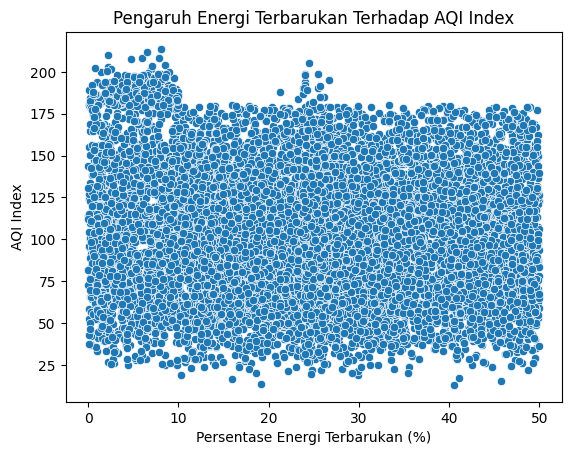

In [43]:
scatterplot_handler(
    env_df,
    "AQI_Index",
    "RenewableEnergyPercentage_%",
    "Pengaruh Energi Terbarukan Terhadap AQI Index",
    "Persentase Energi Terbarukan (%)",
    "AQI Index"
)

##### Annual Energy Savings

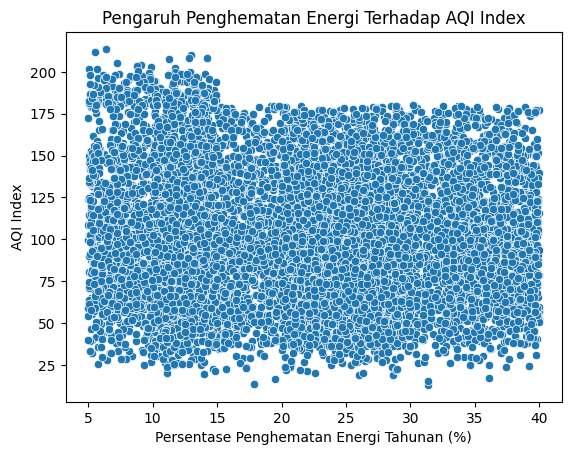

In [44]:
scatterplot_handler(
    env_df,
    "AQI_Index",
    "AnnualEnergySavings_%",
    "Pengaruh Penghematan Energi Terhadap AQI Index",
    "Persentase Penghematan Energi Tahunan (%)",
    "AQI Index"
)

##### Annual Energy Consumption

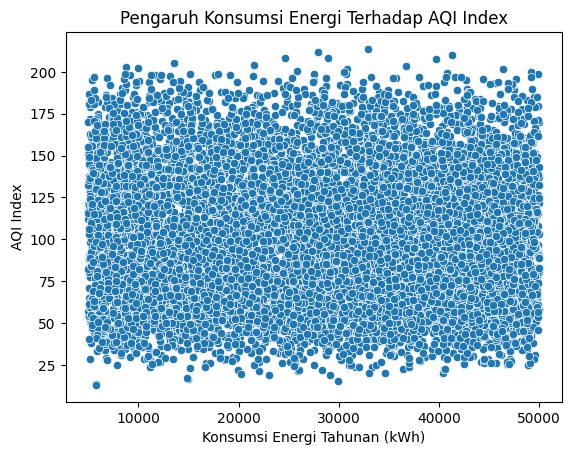

In [51]:
scatterplot_handler(
    env_df,
    "AQI_Index",
    "AnnualEnergyConsumption_kWh",
    "Pengaruh Konsumsi Energi Terhadap AQI Index",
    "Konsumsi Energi Tahunan (kWh)",
    "AQI Index"
)

##### Pollutant

PM2.5

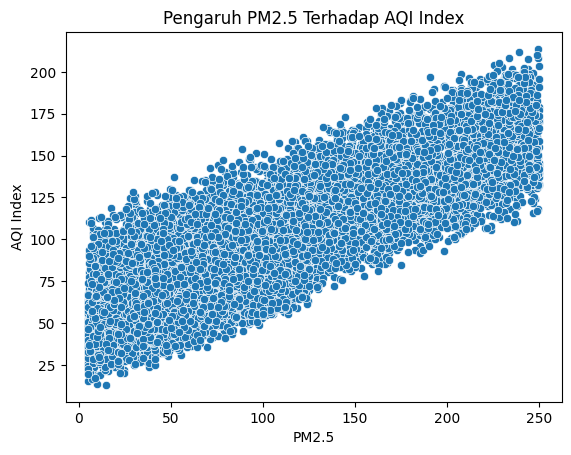

In [45]:
scatterplot_handler(
    env_df,
    "AQI_Index",
    "PM2.5",
    "Pengaruh PM2.5 Terhadap AQI Index",
    "PM2.5",
    "AQI Index"
)

PM10

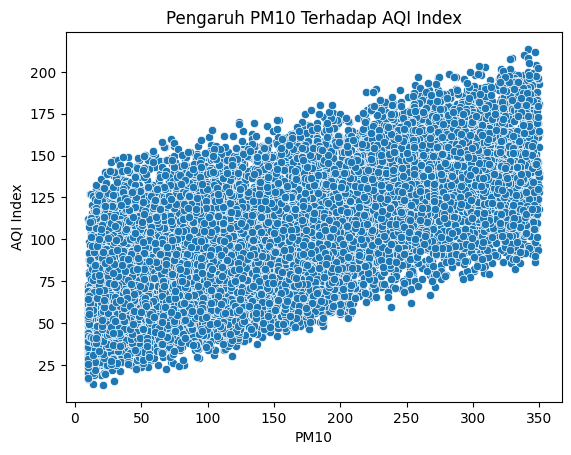

In [46]:
scatterplot_handler(
    env_df,
    "AQI_Index",
    "PM10",
    "Pengaruh PM10 Terhadap AQI Index",
    "PM10",
    "AQI Index"
)

O3

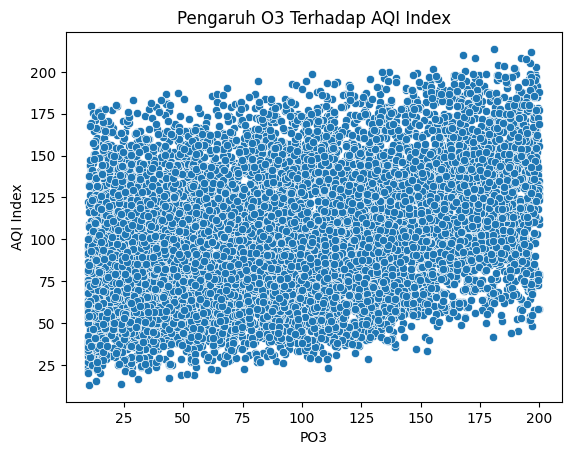

In [47]:
scatterplot_handler(
    env_df,
    "AQI_Index",
    "O3",
    "Pengaruh O3 Terhadap AQI Index",
    "PO3",
    "AQI Index"
)

NO2

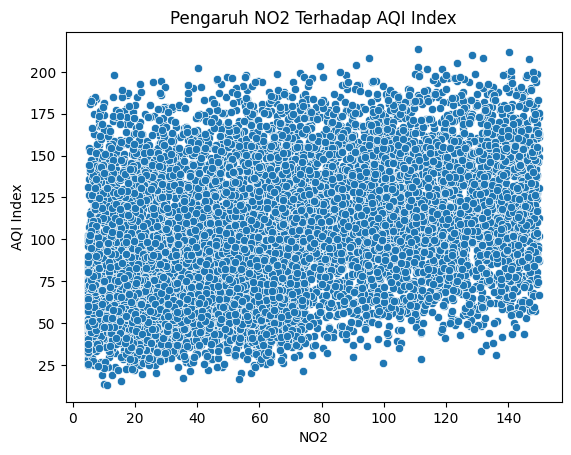

In [48]:
scatterplot_handler(
    env_df,
    "AQI_Index",
    "NO2",
    "Pengaruh NO2 Terhadap AQI Index",
    "NO2",
    "AQI Index"
)

CO

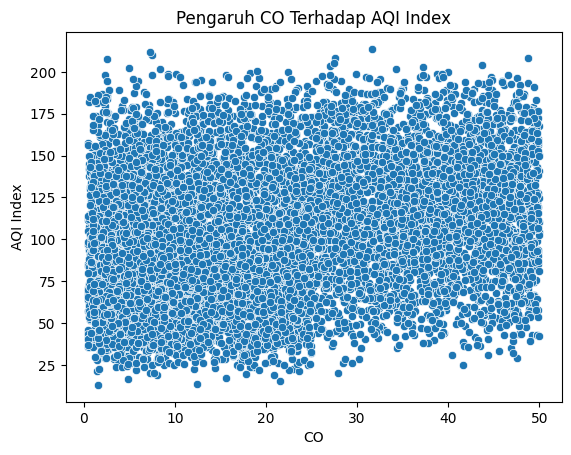

In [49]:
scatterplot_handler(
    env_df,
    "AQI_Index",
    "CO",
    "Pengaruh CO Terhadap AQI Index",
    "CO",
    "AQI Index"
)

SO2

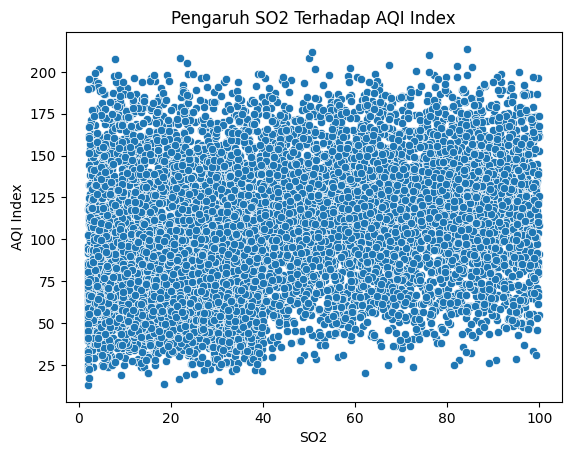

In [50]:
scatterplot_handler(
    env_df,
    "AQI_Index",
    "SO2",
    "Pengaruh SO2 Terhadap AQI Index",
    "SO2",
    "AQI Index"
)

##### Handle Outliers

In [52]:
air_df = env_df[[
    "PM2.5",
    "PM10",
    "O3",
    "NO2",
    "CO",
    "SO2",
    "AnnualEnergySavings_%",
    "AnnualEnergyConsumption_kWh",
    "RenewableEnergyPercentage_%",
    "AQI_Index"
]]

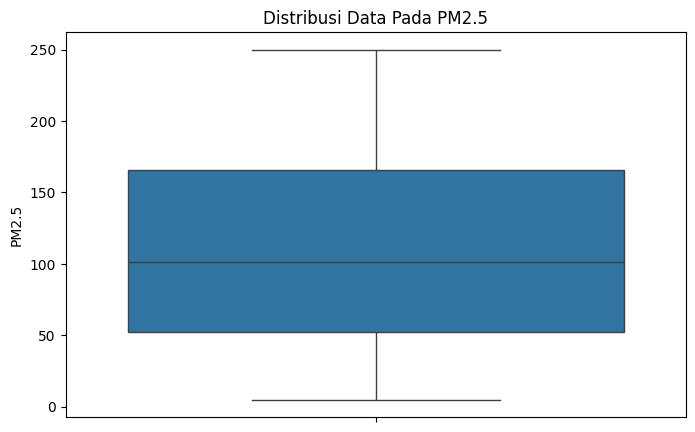

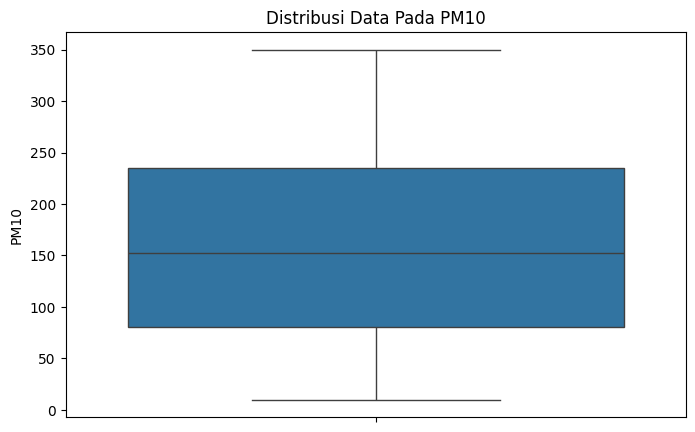

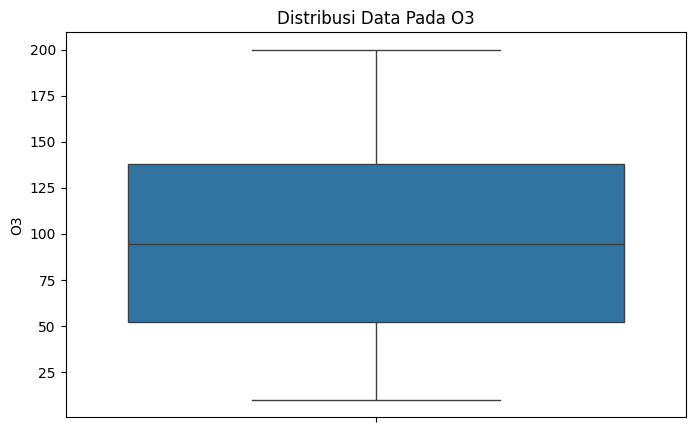

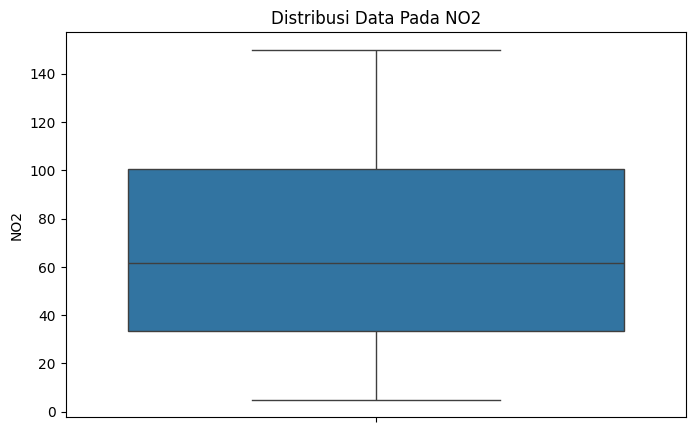

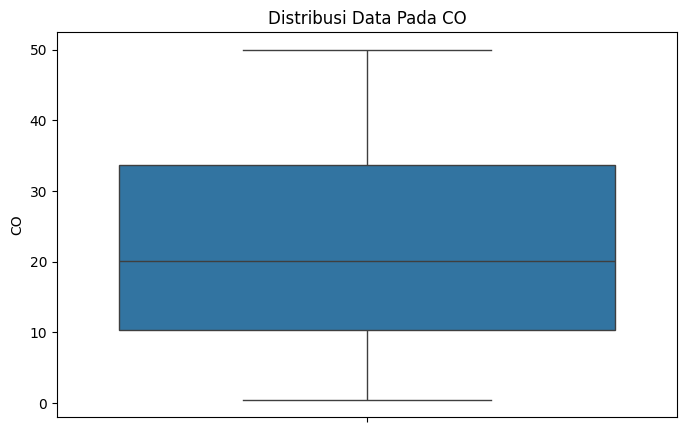

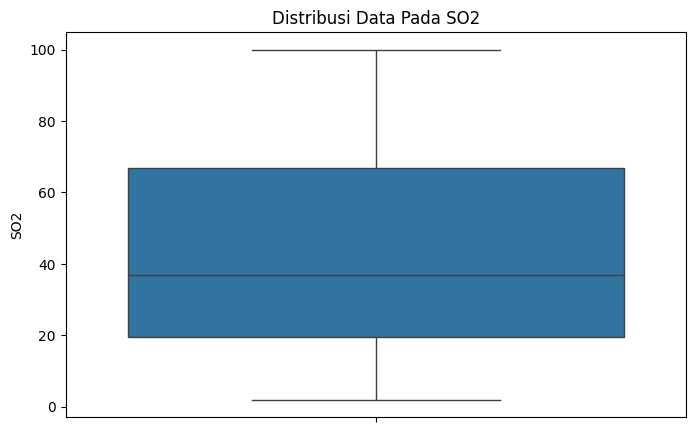

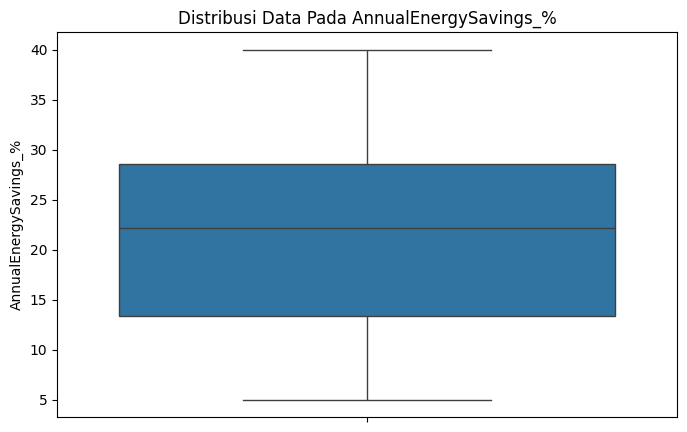

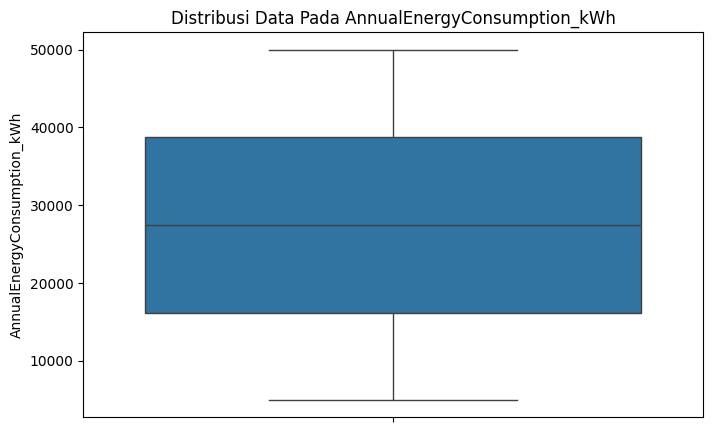

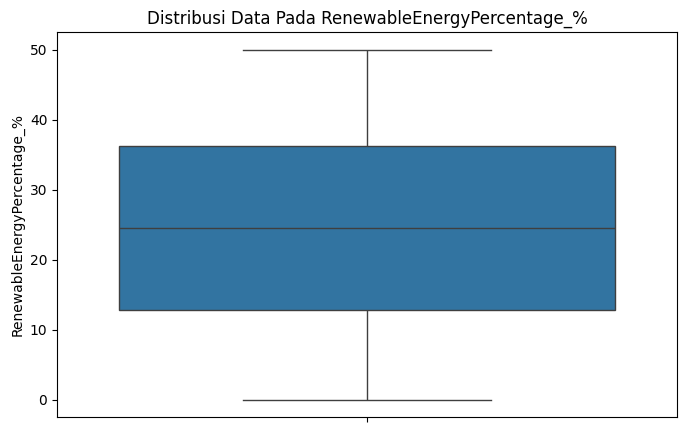

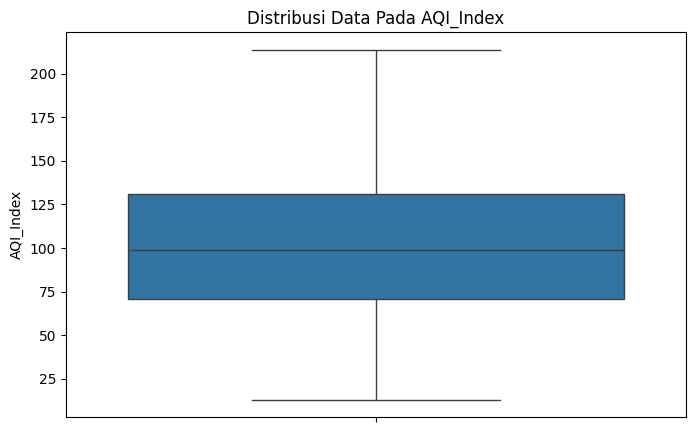

In [53]:
for column in air_df:
    boxplot_handler(air_df[column], f"Distribusi Data Pada {column}")

##### Feature Importance and Correlation

In [54]:
X_adf = air_df.drop(columns = ["AQI_Index"])
y_adf = air_df["AQI_Index"]

In [55]:
X_scaled_adf = scaler.fit_transform(X_adf)

In [56]:
rfr = RandomForestRegressor()

In [57]:
rfr.fit(X_scaled_adf, y_adf)

RandomForestRegressor()

In [58]:
feature_importance = pd.DataFrame({
    "Feature": X_adf.columns,
    "Importance": rfr.feature_importances_
}).sort_values(by = "Importance", ascending = False)

feature_importance

Feature  Importance
0                        PM2.5    0.671803
1                         PM10    0.268400
2                           O3    0.043348
3                          NO2    0.010032
5                          SO2    0.001543
6        AnnualEnergySavings_%    0.001450
4                           CO    0.001445
8  RenewableEnergyPercentage_%    0.001226
7  AnnualEnergyConsumption_kWh    0.000751

In [97]:
air_df.corr()

PM2.5      PM10        O3       NO2        CO  \
PM2.5                        1.000000  0.122629  0.098732  0.170681  0.173685   
PM10                         0.122629  1.000000  0.086798  0.138667  0.138314   
O3                           0.098732  0.086798  1.000000  0.103039  0.121130   
NO2                          0.170681  0.138667  0.103039  1.000000  0.168335   
CO                           0.173685  0.138314  0.121130  0.168335  1.000000   
SO2                          0.179131  0.144705  0.121480  0.198398  0.197512   
AnnualEnergySavings_%       -0.049076 -0.057614 -0.005690 -0.028560  0.010208   
AnnualEnergyConsumption_kWh -0.011160 -0.025168  0.007699 -0.018804 -0.006110   
RenewableEnergyPercentage_% -0.060909 -0.055174 -0.004845 -0.023349  0.009206   
AQI_Index                    0.815688  0.617469  0.336063  0.327369  0.275483   

                                  SO2  AnnualEnergySavings_%  \
PM2.5                        0.179131              -0.049076   
PM10                         0.144705              -0.057614   
O3                           0.121480              -0.005690   
NO2                          0.198398              -0.028560   
CO                           0.197512               0.010208   
SO2                          1.000000               0.000667   
AnnualEnergySavings_%        0.000667               1.000000   
AnnualEnergyConsumption_kWh -0.007701               0.018342   
RenewableEnergyPercentage_% -0.007793               0.728180   
AQI_Index                    0.285972              -0.066512   

                             AnnualEnergyConsumption_kWh  \
PM2.5                                          -0.011160   
PM10                                           -0.025168   
O3                                              0.007699   
NO2                                            -0.018804   
CO                                             -0.006110   
SO2                                            -0.007701   
AnnualEnergySavings_%                           0.018342   
AnnualEnergyConsumption_kWh                     1.000000   
RenewableEnergyPercentage_%                     0.012613   
AQI_Index                                      -0.021060   

                             RenewableEnergyPercentage_%  AQI_Index  
PM2.5                                          -0.060909   0.815688  
PM10                                           -0.055174   0.617469  
O3                                             -0.004845   0.336063  
NO2                                            -0.023349   0.327369  
CO                                              0.009206   0.275483  
SO2                                            -0.007793   0.285972  
AnnualEnergySavings_%                           0.728180  -0.066512  
AnnualEnergyConsumption_kWh                     0.012613  -0.021060  
RenewableEnergyPercentage_%                     1.000000  -0.073285  
AQI_Index                                      -0.073285   1.000000

### Insights

- Teknologi penghematan energi berpengaruh terhadap penghematan energi. Adapun urutan teknologi dengan rata-rata persentase penghematan energi tertinggi yaitu
    - Smart Thermostats
    - Insulation
    - LED Lighting
    - Efficient HVAC
    - Solar Panels
- Jumlah kontribusi energi terbarukan sangat berpengaruh terhadap penghematan energi. Hal ini dapat dilihat dari feature importance tertinggi sebesar 0.66.
- Penghematan energi dan penggunaan energi terbarukan berpengaruh terhadap indeks kualitas udara (AQI). Hal ini dapat dilihat dari feature importance yang tertinggi setelah polutan. 
- Penggunaan energi terbarukan memiliki korelasi negatif terhadap AQI. Hal ini menunjukkan semakin besar penggunaan energi terbarukan, semakin kecil nilai AQI. Oleh karena itu, semakin besar penggunaan energi terbarukan, semakin baik kualitas udara. Begitu pula dengan sebaliknya.
- Adapun kadar polutan yang paling terpengaruh karena adanya penggunaan energi ialah PM2.5. 

# Building Dataset

### Data Processing

In [59]:
building_df = pd.read_csv("building_dataset.csv")

In [60]:
building_df.head(5)

BuildingID  BuildingType  YearBuilt  MonthlyElectricityConsumption_kWh  \
0    B000001   Educational        NaN                             673.62   
1    B000002  Agricultural        NaN                             294.60   
2    B000003        Retail     2020.0                             210.20   
3    B000004    Commercial        NaN                             174.14   
4    B000005   Educational        NaN                              61.27   

   PeakUsageTime_Hour  RenewableCapacity_kWh RenewableType  \
0                   8                3292.66           NaN   
1                  10                   0.00         Tidal   
2                  20                6483.89         Solar   
3                   5               12150.11          Wind   
4                  23                3516.48         Solar   

   RenewableContributionPercentage EnergySource  EnergyEfficiency_kWh_per_m2  \
0                            30.27  Electricity                        21.15   
1                             0.00         Coal                        21.01   
2                            90.72  Electricity                        34.53   
3                            45.16      Biomass                        48.66   
4                            96.59  Electricity                        25.46   

   WeatherData_Temperature_C  WeatherData_SolarIntensity_Hours  \
0                      12.51                              5.44   
1                      18.22                              8.91   
2                      39.40                              3.59   
3                      17.97                              3.65   
4                      16.18                              8.11   

   WeatherData_WindSpeed_km_h  
0                       71.64  
1                       10.85  
2                       13.45  
3                       40.85  
4                       72.20

In [61]:
building_df.drop(columns = ["BuildingID"], inplace = True)

##### Handling Missing Values

In [62]:
building_df.isna().sum()

BuildingType                            0
YearBuilt                            7219
MonthlyElectricityConsumption_kWh       0
PeakUsageTime_Hour                      0
RenewableCapacity_kWh                   0
RenewableType                         568
RenewableContributionPercentage       654
EnergySource                            0
EnergyEfficiency_kWh_per_m2             0
WeatherData_Temperature_C               0
WeatherData_SolarIntensity_Hours        0
WeatherData_WindSpeed_km_h            317
dtype: int64

In [63]:
building_df.drop(columns = ["YearBuilt"], inplace = True)

In [64]:
groupby_building_type_df = building_df.groupby(by = ["BuildingType"]).agg({
    "RenewableType": lambda x: x.mode().iloc[0],
    "RenewableContributionPercentage": "median",
    "WeatherData_WindSpeed_km_h": "median"
})

groupby_building_type_df

RenewableType  RenewableContributionPercentage  \
BuildingType                                                  
Agricultural         Solar                           63.010   
Commercial           Solar                           62.070   
Educational          Solar                           60.720   
Government           Solar                           61.860   
Healthcare           Solar                           60.030   
Hospitality          Solar                           63.050   
Industrial           Solar                           61.100   
Recreational         Solar                           63.280   
Religious            Solar                           62.175   
Residential          Solar                           62.515   
Retail               Solar                           58.740   
Sports               Solar                           63.350   

              WeatherData_WindSpeed_km_h  
BuildingType                              
Agricultural                      58.015  
Commercial                        58.935  
Educational                       57.355  
Government                        59.015  
Healthcare                        59.935  
Hospitality                       59.630  
Industrial                        60.730  
Recreational                      61.490  
Religious                         53.905  
Residential                       59.595  
Retail                            62.315  
Sports                            52.790

In [65]:
groupby_building_type_df.reset_index(inplace = True)

building_df = pd.merge(building_df, groupby_building_type_df, how = "left", on = "BuildingType", suffixes = ["", "_agg"])

columns_to_fill = ["RenewableType", "RenewableContributionPercentage", "WeatherData_WindSpeed_km_h"]
for column in columns_to_fill:
    building_df[column].fillna(building_df[f"{column}_agg"], inplace = True)
    building_df.drop(columns = [f"{column}_agg"], inplace = True)

C:\Users\PC\AppData\Local\Temp\ipykernel_19100\1931318562.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  building_df[column].fillna(building_df[f"{column}_agg"], inplace = True)
C:\Users\PC\AppData\Local\Temp\ipykernel_19100\1931318562.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

##### Handling Duplicate Values

In [66]:
building_df.duplicated().sum()

np.int64(0)

### Exploratory Data Analysis (EDA)

##### Building Type

In [67]:
groupby_building_type_df = building_df.groupby(by = ["BuildingType"]).agg({
    "EnergyEfficiency_kWh_per_m2": "mean",
    "RenewableContributionPercentage": "mean"
}).sort_values(by = "EnergyEfficiency_kWh_per_m2", ascending = False)

groupby_building_type_df

EnergyEfficiency_kWh_per_m2  RenewableContributionPercentage
BuildingType                                                              
Religious                       29.100669                        61.202435
Retail                          28.779341                        59.873610
Recreational                    28.632222                        61.528444
Hospitality                     28.426962                        63.635886
Commercial                      27.996180                        61.077891
Government                      27.970399                        59.929601
Industrial                      27.873239                        60.719098
Sports                          27.724688                        60.846771
Agricultural                    27.697485                        60.381557
Residential                     27.444776                        61.547785
Healthcare                      27.430305                        59.013666
Educational                     26.882533                        60.351605

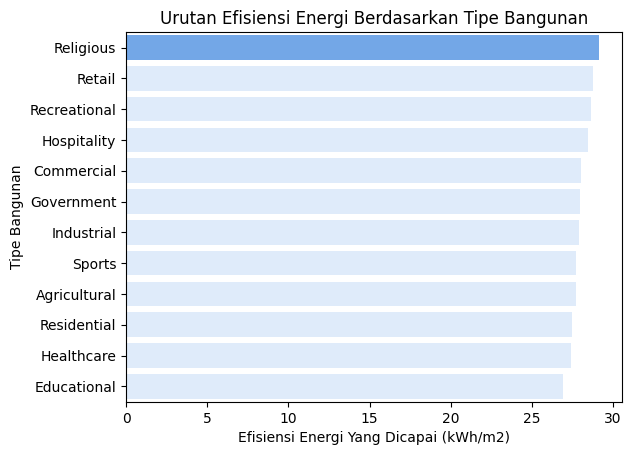

In [71]:
barplot_handler(
    groupby_building_type_df, 
    "BuildingType", 
    "EnergyEfficiency_kWh_per_m2",
    "Urutan Efisiensi Energi Berdasarkan Tipe Bangunan", 
    "Efisiensi Energi Yang Dicapai (kWh/m2)", 
    "Tipe Bangunan"
)

##### Renewable Type

In [72]:
groupby_renewable_type_df = building_df.groupby(by = ["RenewableType"]).agg({
    "EnergyEfficiency_kWh_per_m2": "mean",
}).sort_values(by = "EnergyEfficiency_kWh_per_m2", ascending = False)

groupby_renewable_type_df

EnergyEfficiency_kWh_per_m2
RenewableType                             
Biomass                          28.608083
Geothermal                       28.150648
Wind                             27.952139
Hydro                            27.843064
Solar                            27.401107
Tidal                            25.352952

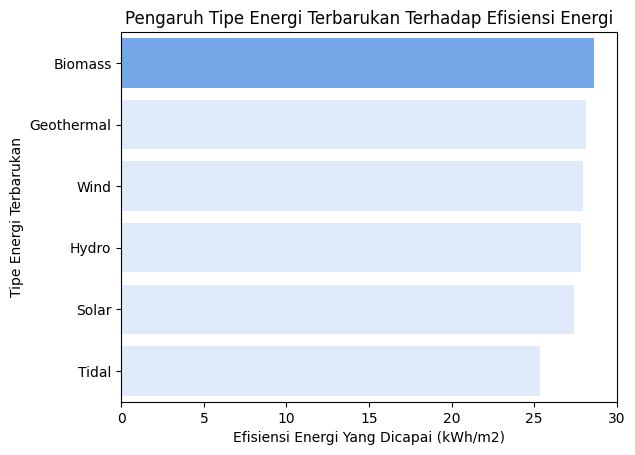

In [74]:
barplot_handler(
    groupby_renewable_type_df,
    "RenewableType",
    "EnergyEfficiency_kWh_per_m2",
    "Pengaruh Tipe Energi Terbarukan Terhadap Efisiensi Energi",
    "Efisiensi Energi Yang Dicapai (kWh/m2)",
    "Tipe Energi Terbarukan",
)

##### Energy Source

In [75]:
groupby_energy_source_df = building_df.groupby(by = ["EnergySource"]).agg({
    "EnergyEfficiency_kWh_per_m2": "mean",
}).sort_values(by = "EnergyEfficiency_kWh_per_m2", ascending = False)

groupby_energy_source_df

EnergyEfficiency_kWh_per_m2
EnergySource                              
Biomass                          28.038593
Electricity                      27.694587
Mixed Sources                    27.679754
Natural Gas                      27.173721
Coal                             25.729423
Oil                              24.327632
Nuclear                          23.780833

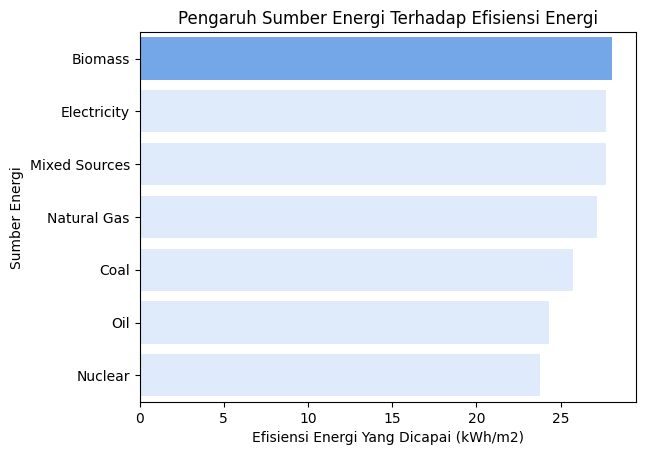

In [77]:
barplot_handler(
    groupby_energy_source_df,
    "EnergySource",
    "EnergyEfficiency_kWh_per_m2",
    "Pengaruh Sumber Energi Terhadap Efisiensi Energi",
    "Efisiensi Energi Yang Dicapai (kWh/m2)",
    "Sumber Energi"
)

##### Monthly Electrical Consumption

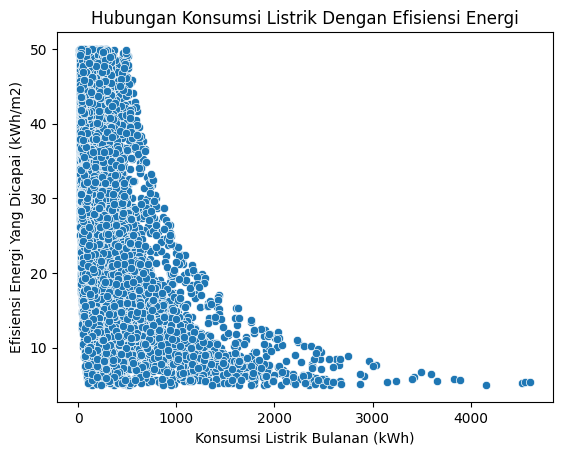

In [79]:
scatterplot_handler(
    building_df,
    "EnergyEfficiency_kWh_per_m2",
    "MonthlyElectricityConsumption_kWh",
    "Hubungan Konsumsi Listrik Dengan Efisiensi Energi",
    "Konsumsi Listrik Bulanan (kWh)",
    "Efisiensi Energi Yang Dicapai (kWh/m2)",
)

##### Peak Usage Time

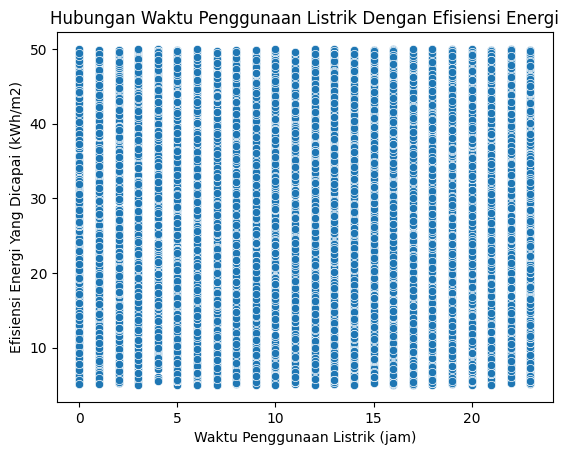

In [80]:
scatterplot_handler(
    building_df,
    "EnergyEfficiency_kWh_per_m2",
    "PeakUsageTime_Hour",
    "Hubungan Waktu Penggunaan Listrik Dengan Efisiensi Energi",
    "Waktu Penggunaan Listrik (jam)",
    "Efisiensi Energi Yang Dicapai (kWh/m2)",
)

##### Renewable Contribution Percentage

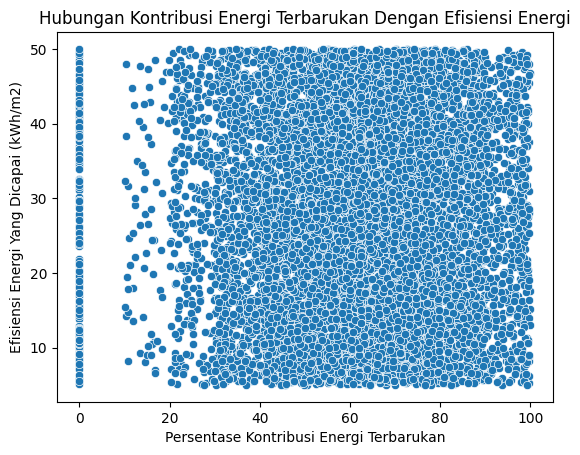

In [81]:
scatterplot_handler(
    building_df,
    "EnergyEfficiency_kWh_per_m2",
    "RenewableContributionPercentage",
    "Hubungan Kontribusi Energi Terbarukan Dengan Efisiensi Energi",
    "Persentase Kontribusi Energi Terbarukan",
    "Efisiensi Energi Yang Dicapai (kWh/m2)"
)

##### Weather Data (Temperature)

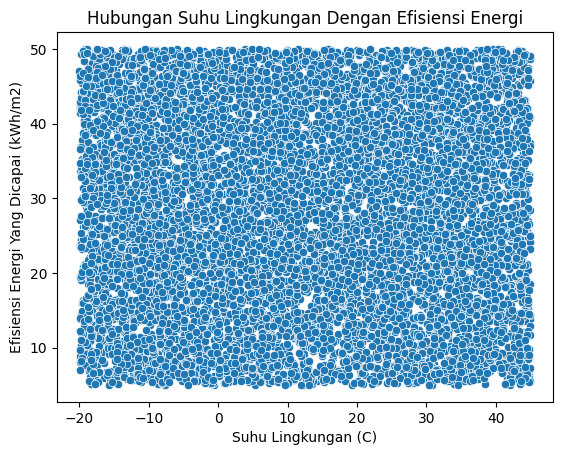

In [82]:
scatterplot_handler(
    building_df,
    "EnergyEfficiency_kWh_per_m2",
    "WeatherData_Temperature_C",
    "Hubungan Suhu Lingkungan Dengan Efisiensi Energi",
    "Suhu Lingkungan (C)",
    "Efisiensi Energi Yang Dicapai (kWh/m2)"
)

##### Weather Data (Solar Intensity)

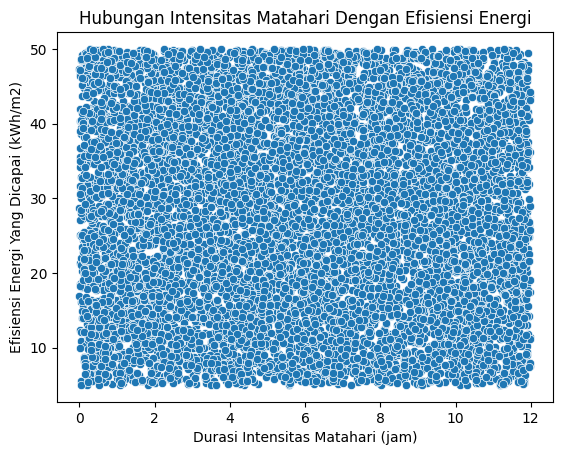

In [83]:
scatterplot_handler(
    building_df,
    "EnergyEfficiency_kWh_per_m2",
    "WeatherData_SolarIntensity_Hours",
    "Hubungan Intensitas Matahari Dengan Efisiensi Energi",
    "Durasi Intensitas Matahari (jam)",
    "Efisiensi Energi Yang Dicapai (kWh/m2)",
)

##### Weather Data (Wind Speed)

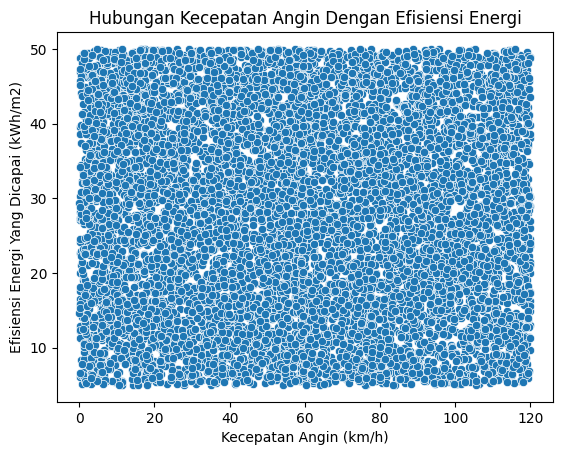

In [84]:
scatterplot_handler(
    building_df,
    "EnergyEfficiency_kWh_per_m2",
    "WeatherData_WindSpeed_km_h",
    "Hubungan Kecepatan Angin Dengan Efisiensi Energi",
    "Kecepatan Angin (km/h)",
    "Efisiensi Energi Yang Dicapai (kWh/m2)"
)

##### Handle Outliers

In [85]:
building_df = building_df[[
    "BuildingType",
    "MonthlyElectricityConsumption_kWh",
    "PeakUsageTime_Hour",
    "RenewableType",
    "RenewableContributionPercentage",
    "EnergySource",
    "WeatherData_Temperature_C",
    "WeatherData_SolarIntensity_Hours",
    "WeatherData_WindSpeed_km_h",
    "EnergyEfficiency_kWh_per_m2"
]]

In [86]:
building_df_categorical_columns = ["BuildingType", "RenewableType", "EnergySource"]

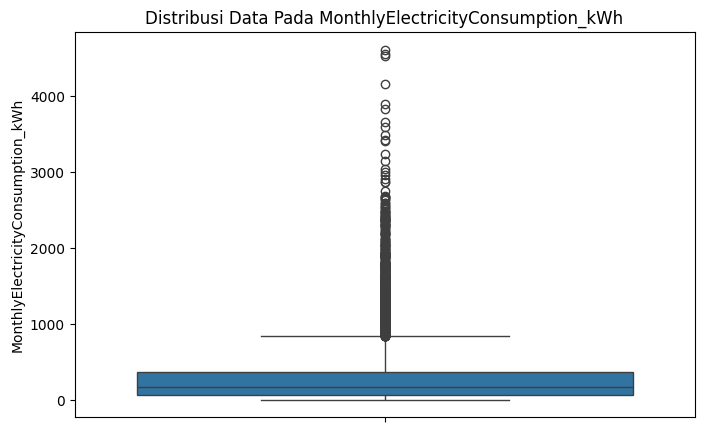

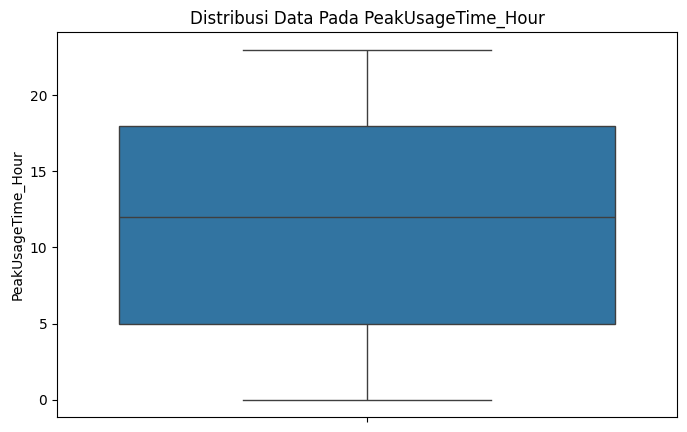

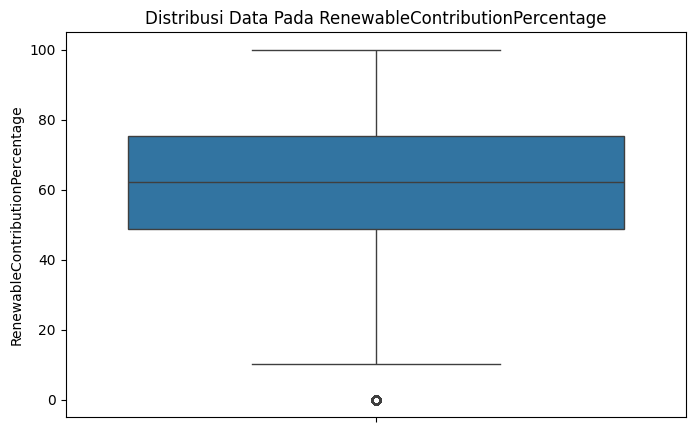

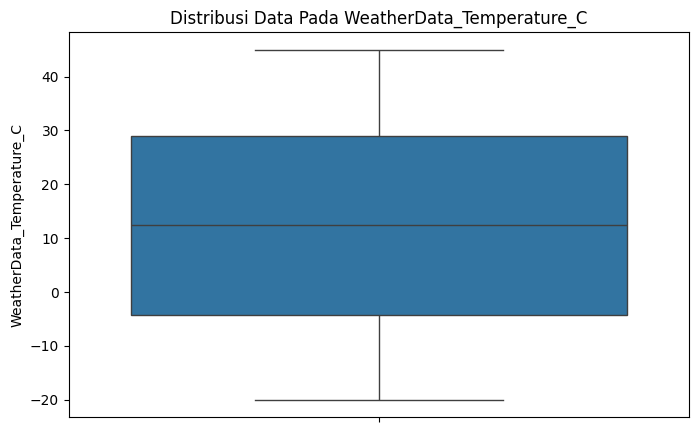

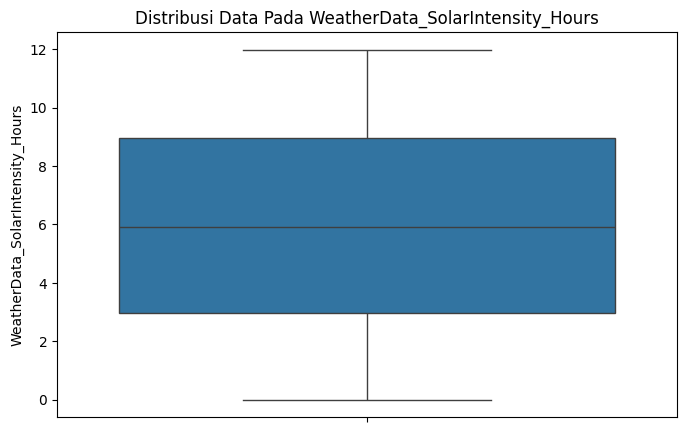

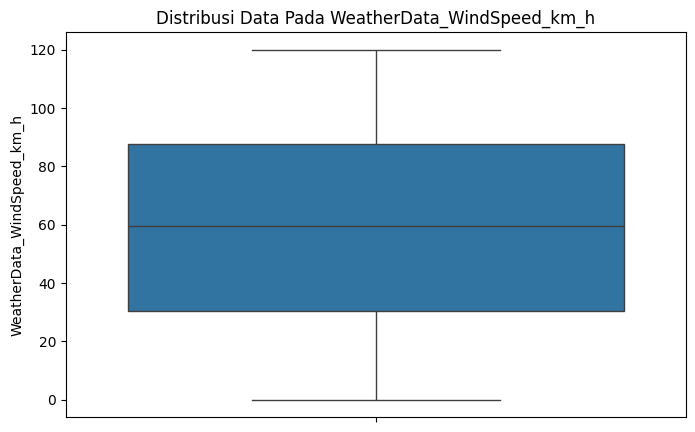

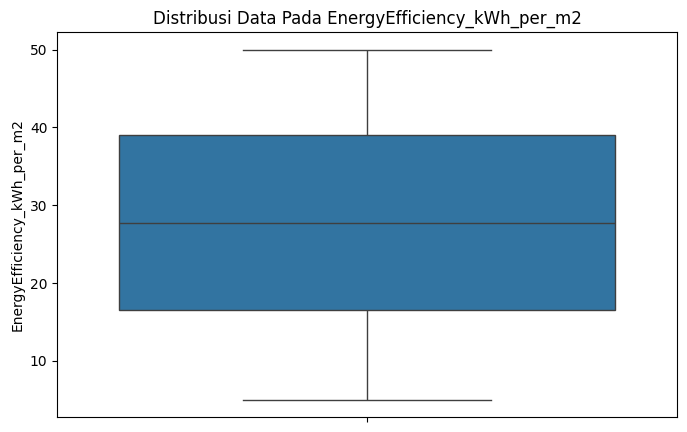

In [87]:
building_df_numerical_columns = []
for column in building_df.columns:
    if column not in building_df_categorical_columns:
        building_df_numerical_columns.append(column)
        boxplot_handler(building_df[column], f"Distribusi Data Pada {column}")

In [88]:
building_df = remove_outliers_handler(building_df, "MonthlyElectricityConsumption_kWh")
building_df = remove_outliers_handler(building_df, "RenewableContributionPercentage")

##### Feature Importance and Correlation

In [89]:
scaler = StandardScaler()

In [90]:
for column in building_df_categorical_columns:
    if column in building_df.columns:
        building_df[column] = building_df[column].astype("category").cat.codes

In [91]:
X_bdf = building_df.drop(columns = ["EnergyEfficiency_kWh_per_m2"])
y_bdf = building_df["EnergyEfficiency_kWh_per_m2"]

In [92]:
X_scaled_bdf = scaler.fit_transform(X_bdf)

In [93]:
rfr = RandomForestRegressor()

In [94]:
rfr.fit(X_scaled_bdf, y_bdf)

RandomForestRegressor()

In [95]:
feature_importance = pd.DataFrame({
    "Feature": X_bdf.columns,
    "Importance": rfr.feature_importances_
}).sort_values(by = "Importance", ascending = False)

feature_importance

Feature  Importance
1  MonthlyElectricityConsumption_kWh    0.387076
0                       BuildingType    0.200535
8         WeatherData_WindSpeed_km_h    0.083284
6          WeatherData_Temperature_C    0.081166
7   WeatherData_SolarIntensity_Hours    0.079533
4    RenewableContributionPercentage    0.078516
2                 PeakUsageTime_Hour    0.055102
3                      RenewableType    0.020395
5                       EnergySource    0.014393

In [96]:
building_df.corr()

BuildingType  \
BuildingType                           1.000000   
MonthlyElectricityConsumption_kWh     -0.388614   
PeakUsageTime_Hour                     0.009914   
RenewableType                          0.006009   
RenewableContributionPercentage        0.017878   
EnergySource                           0.006894   
WeatherData_Temperature_C             -0.006399   
WeatherData_SolarIntensity_Hours       0.015986   
WeatherData_WindSpeed_km_h             0.009006   
EnergyEfficiency_kWh_per_m2           -0.059570   

                                   MonthlyElectricityConsumption_kWh  \
BuildingType                                               -0.388614   
MonthlyElectricityConsumption_kWh                           1.000000   
PeakUsageTime_Hour                                          0.001550   
RenewableType                                              -0.016925   
RenewableContributionPercentage                            -0.012358   
EnergySource                                               -0.011547   
WeatherData_Temperature_C                                  -0.013252   
WeatherData_SolarIntensity_Hours                           -0.003039   
WeatherData_WindSpeed_km_h                                  0.000929   
EnergyEfficiency_kWh_per_m2                                -0.334931   

                                   PeakUsageTime_Hour  RenewableType  \
BuildingType                                 0.009914       0.006009   
MonthlyElectricityConsumption_kWh            0.001550      -0.016925   
PeakUsageTime_Hour                           1.000000      -0.019471   
RenewableType                               -0.019471       1.000000   
RenewableContributionPercentage              0.010691       0.236431   
EnergySource                                 0.005928       0.025128   
WeatherData_Temperature_C                    0.013519      -0.007084   
WeatherData_SolarIntensity_Hours             0.006746       0.023286   
WeatherData_WindSpeed_km_h                  -0.011289      -0.008321   
EnergyEfficiency_kWh_per_m2                 -0.001294      -0.001812   

                                   RenewableContributionPercentage  \
BuildingType                                              0.017878   
MonthlyElectricityConsumption_kWh                        -0.012358   
PeakUsageTime_Hour                                        0.010691   
RenewableType                                             0.236431   
RenewableContributionPercentage                           1.000000   
EnergySource                                              0.008472   
WeatherData_Temperature_C                                -0.014066   
WeatherData_SolarIntensity_Hours                         -0.007344   
WeatherData_WindSpeed_km_h                               -0.016451   
EnergyEfficiency_kWh_per_m2                              -0.003550   

                                   EnergySource  WeatherData_Temperature_C  \
BuildingType                           0.006894                  -0.006399   
MonthlyElectricityConsumption_kWh     -0.011547                  -0.013252   
PeakUsageTime_Hour                     0.005928                   0.013519   
RenewableType                          0.025128                  -0.007084   
RenewableContributionPercentage        0.008472                  -0.014066   
EnergySource                           1.000000                   0.012094   
WeatherData_Temperature_C              0.012094                   1.000000   
WeatherData_SolarIntensity_Hours       0.004371                  -0.017105   
WeatherData_WindSpeed_km_h             0.007560                   0.009737   
EnergyEfficiency_kWh_per_m2           -0.011653                   0.012755   

                                   WeatherData_SolarIntensity_Hours  \
BuildingType                                               0.015986   
MonthlyElectricityConsumption_kWh                         -0.003039   
PeakUsageTime_Hour                          

### Insights

- Tipe bangunan berpengaruh terhadap efisiensi energi. Adapun urutan tipe bangunan dengan rata-rata efisiensi energi tertinggi yaitu:
    - Religious
    - Retail
    - Recreational
    - Hospitality
    - Commercial
    - Government
    - Industrial
    - Sports
    - Agricultural
    - Residential
    - Healthcare
    - Educational
- Jumlah kontribusi energi terbarukan pada bangunan mempengaruhi efisiensi energi. Hal ini dapat dilihat dari bangunan religious yang memiliki kontribusi sebesar 61.20%, berbanding terbalik dengan bangunan healthcare yang hanya memiliki kontribusi sebesar 59.01%.
- Tipe energi terbarukan berpengaruh terhadap efisiensi energi. Adapun urutan tipe energi terbarukan dengan rata-rata efisiensi energi tertinggi yaitu:
    - Biomass
    - Geothermal
    - Wild
    - Hydro
    - Solar
    - Tidal
- Sumber energi utama bangunan berpengaruh terhadap efisiensi energi. Adapun urutan sumber energi utama dengan rata-rata efisiensi energi tertinggi yaitu:
    - Biomass
    - Electricity
    - Mixed Sources
    - Natural Gas
    - Coal
    - Oil
    - Nuclear